# Digit Recognizer
1. [Converting to numpy arrays](#head1)
2. [Loading Images](#head2)
3. [CNN Model](#head2)
4. [Evaluation and training curves.](#head3)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

# <a name="head1"></a> 1.Converting to numpy arrays
images were converted into numpy arrays for easy access using the following code.

In [2]:
# import pandas as pd
# raw_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
# def csv_to_numpy(raw_data):
#     images = np.empty((0,28,28,1))
#     for i in range(len(raw_data)):
#         image = raw_data.iloc[i,:]
#         image = image.values
#         image = image.reshape(1,28,28,1)
#         images = np.append(images,image, axis=0)
#         if not(i % 1000):
#             print(i)
#     return images
# images = csv_to_numpy(raw_data)

# 2.Loading in the data <a name="head2"></a>
The numpy arrays created were split into test and train data and also normalised.    
Also the labels were one-hot encoded as the ouput will be a dense layer of size 10.   
I have split the data 90/10 but you can change it by editing the ratio parameter.   

In [3]:
def load_dataset_normalised(ratio):
    idx = np.random.permutation(42000)
    
    images = np.load('/kaggle/input/mnist-digit-images-in-numpy-arrays/images.npy')
    images_label = np.load('/kaggle/input/mnist-digit-images-in-numpy-arrays/images_label.npy')
    
    X_train = images[idx[0:int(ratio*42000)]]/255 #normalization and test train split
    X_train = X_train[:,:,:,np.newaxis]
    Y_train = images_label[idx[0:int(ratio*42000)]]
    #one-hot encoding
    a = Y_train
    b = np.zeros((a.size, a.max()+1))
    b[np.arange(a.size),a] = 1
    Y_train = b
    
    X_test = images[idx[int(ratio*42000)+1:]]/255
    X_test = X_test[:,:,:,np.newaxis]
    Y_test = images_label[idx[int(ratio*42000)+1:]]
    #one-hot encoding
    a = Y_test
    b = np.zeros((a.size, a.max()+1))
    b[np.arange(a.size),a] = 1
    Y_test = b
    
    return X_train, Y_train, X_test, Y_test

In [4]:
ratio = 0.9
X_train, Y_train, X_test, Y_test = load_dataset_normalised(ratio) 

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 37800
number of test examples = 4199
X_train shape: (37800, 28, 28, 1)
Y_train shape: (37800, 10)
X_test shape: (4199, 28, 28, 1)
Y_test shape: (4199, 10)


In [5]:
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test,axis=0)

In [6]:
import keras

Using TensorFlow backend.


# CNN
Created using keras

In [7]:
def DigitModel(input_shape):
    X_input=keras.Input(input_shape)
    
    X=keras.layers.ZeroPadding2D((3,3))(X_input)
    
    X = keras.layers.Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = keras.layers.BatchNormalization(axis = 3, name = 'bn0')(X)
    X = keras.layers.Activation('relu')(X)
    
    X = keras.layers.MaxPooling2D((2, 2), name='max_pool_0')(X)
    
    X = keras.layers.Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1')(X)
    X = keras.layers.BatchNormalization(axis = 3, name = 'bn1')(X)
    X = keras.layers.Activation('relu')(X)
    
    X = keras.layers.AveragePooling2D((2, 2),strides=2, name='avg_pool_0')(X)
    
    
    X = keras.layers.Flatten()(X)
    X = keras.layers.Dense(20, activation='relu')(X)
    X = keras.layers.Dense(10, activation='sigmoid', name='fc')(X)

    model = keras.models.Model(inputs = X_input, outputs = X, name='digitModel')
    
    return model

In [8]:
digitModel = DigitModel((28,28,1))

In [9]:
digitModel.summary()

Model: "digitModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 34, 34, 1)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 28, 28, 32)        1600      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 28, 28, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pool_0 (MaxPooling2D)    (None, 14, 14, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 4, 4, 64)          1

In [10]:
digitModel.compile(optimizer="Adam",loss="categorical_crossentropy",metrics = ["accuracy"])

In [11]:
history = digitModel.fit(x= X,y=Y,validation_split=0.15,epochs=4,batch_size=64)

Train on 35699 samples, validate on 6300 samples
Epoch 1/4
35699/35699 [==============================] - 33s 924us/step - loss: 0.2744 - accuracy: 0.9086 - val_loss: 0.3069 - val_accuracy: 0.9089
Epoch 2/4
35699/35699 [==============================] - 30s 844us/step - loss: 0.0476 - accuracy: 0.9860 - val_loss: 0.0523 - val_accuracy: 0.9844
Epoch 3/4
35699/35699 [==============================] - 32s 894us/step - loss: 0.0316 - accuracy: 0.9905 - val_loss: 0.0883 - val_accuracy: 0.9737
Epoch 4/4
35699/35699 [==============================] - 30s 838us/step - loss: 0.0254 - accuracy: 0.9920 - val_loss: 0.0536 - val_accuracy: 0.9841


In [12]:
from IPython.display import Audio, display

def allDone():
  display(Audio(url='https://www.myinstants.com/media/sounds/tuturu_1.mp3', autoplay=True))
allDone()

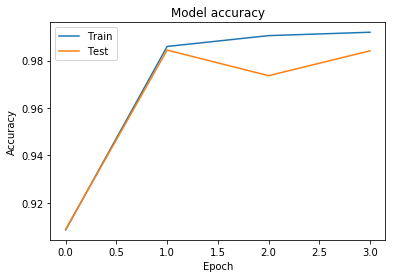

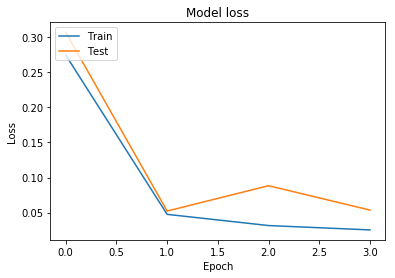

In [13]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.clf()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [14]:
digitModel.save("kerasModelv1.h5")

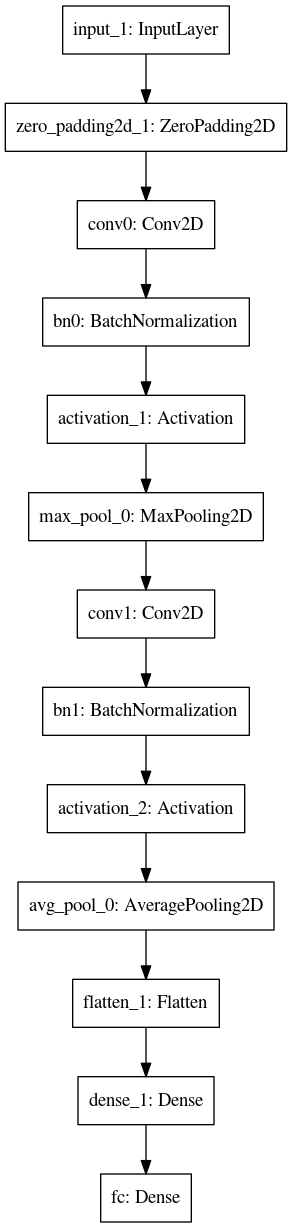

In [15]:
from keras.utils import plot_model
plot_model(digitModel, to_file='model.png')

In [16]:
# from keras.models import load_model
X = np.load('/kaggle/input/mnist-digit-images-in-numpy-arrays/test-images.npy')
predictions = digitModel.predict(X/255)

In [17]:
temp = predictions.argmax(axis = 1)
temp #These are the predictions of the model

array([2, 0, 9, ..., 3, 9, 2])

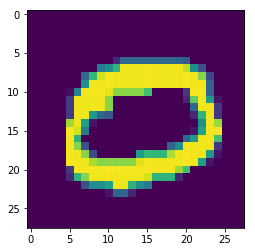

In [18]:
plt.imshow(X[1].reshape(28,28)) #manual check

In [19]:
submission = pd.DataFrame({'ImageId': range(1,len(temp)+1), 'Label': temp})
submission.to_csv('submission.csv',index=False)